## Eniac A/B Insight
### 1. Objective
Dive into a comprehensive analysis aimed at boosting iPhone 13 sales by optimizing the Click-Through Rate (CTR) of the “SHOP NOW” button, compare different button designs and determine the most effective strategy for increasing engagement.



### 2. Hypotheses
### Null Hypothesis (H₀)
There is no difference in the Click-Through Rate (CTR) between the current “SHOP NOW” button and the variants (A, B, C, and D).

### Alternative Hypothesis (H₁)
There is a difference in the Click-Through Rate (CTR) between the current “SHOP NOW” button and at least one of the variants (A, B, C, or D).


###  3. Metric for Evaluation
#####
The primary metric for evaluating the success of a variant is the Click-Through Rate (CTR) of the “SHOP NOW” button. 

Additional metrics would also include:
- Conversion Rate (CR)
- Bounce Rate
- Average Order Value (AOV)
- Time on Page
- User Feedback

### 4. Experiment Parameters

##### Test Parameters
- **Significance Level (α)**: 0.05
- **Minimum Detectable Effect (MDE)**: 0.5% absolute increase in CTR
- **Sample Size**: Determined based on power analysis to ensure statistical significance


### 5. Data Period
#### The data collection period for the experiment spans from 02 November 2021 to 16 November 2021, covering a comprehensive timeframe to capture sufficient user interactions and ensure reliable results.

### 6. Code Along
##### 1. CTR: click-through rate (CTR) for each button version.
##### 2. Clicks and No-Clicks Table
##### 3. Chi-square test to check for statistical significance.
##### 4. Version with the highest CTR.
##### 5. Metrics Plot


In [50]:
# Global Configuration
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import stats

import warnings
warnings.filterwarnings('ignore')

# Set global configuration for plots
plt.style.use('ggplot')
sns.set(style='whitegrid')

In [ ]:
# Define local dataread file paths
eniac_a_file = 'D:/WBS Coding/Bootcamp/Python/Pandas/4-AB Testing/Project Work/Datasets/eniac_a.csv'
eniac_b_file = 'D:/WBS Coding/Bootcamp/Python/Pandas/4-AB Testing/Project Work/Datasets/eniac_b.csv'
eniac_c_file = 'D:/WBS Coding/Bootcamp/Python/Pandas/4-AB Testing/Project Work/Datasets/eniac_c.csv'
eniac_d_file = 'D:/WBS Coding/Bootcamp/Python/Pandas/4-AB Testing/Project Work/Datasets/eniac_d.csv'

# Replace the above file paths with the local file paths on your machine or Google drive paths as may be applicable


In [4]:
# Load data into pandas DataFrames
df_a = pd.read_csv(eniac_a_file)
df_b = pd.read_csv(eniac_b_file)
df_c = pd.read_csv(eniac_c_file)
df_d = pd.read_csv(eniac_d_file)


In [ ]:
# Set display options
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.width', 1000)  

In [9]:
# Explore Dataset A

df_a.head()


,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,269,True,Homepage Version A - white SHOP NOW • https://eniac.com/index-a.php
1,25,div,mySidebar,309,True,"created 2021-09-14 • 14 days 0 hours 34 mins • 25326 visits, 23174 clicks"
2,4,a,Mac,279,True,NaN
3,69,a,iPhone,246,True,NaN
4,105,a,Accessories,1235,True,NaN


In [10]:
# Explore Dataset B

df_b.head()

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,236,True,Homepage Version B - red SHOP NOW • https://eniac.com/index-b.php
1,25,div,mySidebar,304,True,"created 2021-10-27 • 14 days 0 hours 34 mins • 24747 visits, 22592 clicks"
2,4,a,Mac,268,True,NaN
3,69,a,iPhone,260,True,NaN
4,105,a,Accessories,1214,True,NaN


In [11]:
# Explore Dataset C

df_c.head()

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,288,True,Homepage Version C - white SEE DEALS • https://eniac.com/index-c.php
1,25,div,mySidebar,283,True,"created 2021-10-27 • 14 days 0 hours 34 mins • 24876 visits, 23031 clicks"
2,4,a,Mac,262,True,NaN
3,69,a,iPhone,234,True,NaN
4,105,a,Accessories,1288,True,NaN


In [12]:
# Explore Dataset D

df_d.head()

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,285,True,Homepage Version D - red SEE DEALS • https://eniac.com/index-d.php
1,25,div,mySidebar,305,True,"created 2021-10-27 • 14 days 0 hours 34 mins • 25233 visits, 23062 clicks"
2,4,a,Mac,274,True,NaN
3,69,a,iPhone,243,True,NaN
4,105,a,Accessories,1267,True,NaN


In [13]:
# Dataset Summary (check for missing values in dataset A)
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Element ID            57 non-null     int64 
 1   Tag name              57 non-null     object
 2   Name                  57 non-null     object
 3   No. clicks            57 non-null     int64 
 4   Visible?              57 non-null     bool  
 5   Snapshot information  2 non-null      object
dtypes: bool(1), int64(2), object(3)
memory usage: 2.4+ KB


In [14]:
# Dataset Summary (check for missing values in dataset B)
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Element ID            57 non-null     int64 
 1   Tag name              57 non-null     object
 2   Name                  57 non-null     object
 3   No. clicks            57 non-null     int64 
 4   Visible?              57 non-null     bool  
 5   Snapshot information  2 non-null      object
dtypes: bool(1), int64(2), object(3)
memory usage: 2.4+ KB


In [ ]:
# Dataset Summary (check for missing values in dataset C)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Element ID            57 non-null     int64 
 1   Tag name              57 non-null     object
 2   Name                  57 non-null     object
 3   No. clicks            57 non-null     int64 
 4   Visible?              57 non-null     bool  
 5   Snapshot information  2 non-null      object
dtypes: bool(1), int64(2), object(3)
memory usage: 2.4+ KB


In [16]:
# Dataset Summary (check for missing values in dataset D)
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Element ID            57 non-null     int64 
 1   Tag name              57 non-null     object
 2   Name                  57 non-null     object
 3   No. clicks            57 non-null     int64 
 4   Visible?              57 non-null     bool  
 5   Snapshot information  2 non-null      object
dtypes: bool(1), int64(2), object(3)
memory usage: 2.4+ KB


##### 6.1. CTR: click-through rate (CTR) for each button version

In [22]:
# Extracting the number of clicks for each version
eniac_a_CTRClicks = df_a.loc[df_a["Name"]=="SHOP NOW", "No. clicks"].iloc[0]
eniac_b_CTRClicks = df_b.loc[df_b["Name"]=="SHOP NOW", "No. clicks"].iloc[0]
eniac_c_CTRClicks = df_c.loc[df_c["Name"]=="SEE DEALS", "No. clicks"].iloc[0]
eniac_d_CTRClicks = df_d.loc[df_d["Name"]=="SEE DEALS", "No. clicks"].iloc[0]

In [23]:
eniac_a_CTRClicks,eniac_b_CTRClicks, eniac_c_CTRClicks,eniac_d_CTRClicks

(np.int64(512), np.int64(281), np.int64(527), np.int64(193))

##### 6.2. Clicks and No-Clicks Table

In [27]:
# Visits for each version from individual datasets (manual entry)
eniac_a_CTRvisits = 25326
eniac_b_CTRvisits = 24747
eniac_c_CTRvisits = 24876
eniac_d_CTRvisits = 25233

In [28]:
# Calculate non-clicks
eniac_a_CTRnon_Clicks = eniac_a_CTRvisits - eniac_a_CTRClicks
eniac_b_CTRnon_Clicks = eniac_b_CTRvisits - eniac_b_CTRClicks
eniac_c_CTRnon_Clicks = eniac_c_CTRvisits - eniac_c_CTRClicks
eniac_d_CTRnon_Clicks = eniac_d_CTRvisits - eniac_d_CTRClicks

eniac_a_CTRnon_Clicks, eniac_b_CTRnon_Clicks, eniac_c_CTRnon_Clicks,eniac_a_CTRnon_Clicks

(np.int64(24814), np.int64(24466), np.int64(24349), np.int64(24814))

In [34]:
# Clicks and No-Clicks Table
clicks = [eniac_a_CTRClicks, eniac_b_CTRClicks, eniac_c_CTRClicks, eniac_d_CTRClicks]
noclicks = [eniac_a_CTRnon_Clicks, eniac_b_CTRnon_Clicks, eniac_c_CTRnon_Clicks, eniac_d_CTRnon_Clicks]

observed_results = pd.DataFrame(data=[clicks, noclicks],
                                columns=["Version_A", "Version_B", "Version_C", "Version_D"],
                                index=["Click", "No-click"])
print("Observed Results:")
observed_results

Observed Results:


,Version_A,Version_B,Version_C,Version_D
Click,512,281,527,193
No-click,24814,24466,24349,25040


##### 6.3. Chi-square test to check for statistical significance.

In [43]:
# Chi-square test, results
chi2, p, dof, expected = chi2_contingency(observed_results)

alpha = 0.05

print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")

# statistical significance
if p < 0.05:
    print("Reject the null hypothesis: There is a significant difference in CTR between the variants.")
else:
    print("Fail to reject the null hypothesis: No significant difference in CTR between the variants.")


Chi-square test statistic: 224.01877488058412
P-value: 2.716121660786871e-48
Reject the null hypothesis: There is a significant difference in CTR between the variants.


##### 6.4. Version with Highest CTR

In [52]:
# Each version CTR
ctr_a = (eniac_a_CTRClicks / eniac_a_CTRvisits) * 100
ctr_b = (eniac_b_CTRClicks / eniac_b_CTRvisits) * 100
ctr_c = (eniac_c_CTRClicks / eniac_c_CTRvisits) * 100
ctr_d = (eniac_d_CTRClicks / eniac_d_CTRvisits) * 100

# User Dictionary with CTR values
ctr_dict = {
    "White SHOP NOW": ctr_a,
    "Red SHOP NOW": ctr_b,
    "White SEE DEALS": ctr_c,
    "Red SEE DEALS": ctr_d
}
winner = max(ctr_dict, key=ctr_dict.get)
print(f"\nThe winning version is '{winner}' with a CTR of {ctr_dict[winner]:.2f}%")


The winning version is 'White SEE DEALS' with a CTR of 2.12%


##### 6.5. Metrics Plot

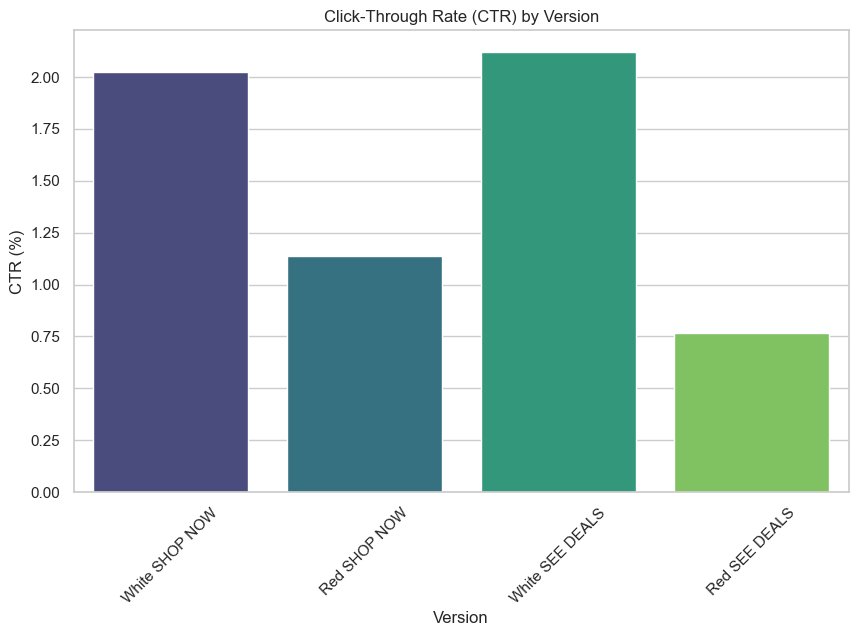

The winning version is 'White SEE DEALS' with a CTR of 2.12%


In [55]:
# Create a DataFrame from the dictionary
ctr_data = pd.DataFrame(list(ctr_dict.items()), columns=['Version', 'CTR'])

# Plotting the CTR values using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Version', y='CTR', data=ctr_data, palette='viridis')
plt.title('Click-Through Rate (CTR) by Version')
plt.xlabel('Version')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.show()

print(f"The winning version is '{winner}' with a CTR of {ctr_dict[winner]:.2f}%")

### 7. Results Analysis
#### Winning Version: “White SEE DEALS”
CTR: 2.12%

Significance: "White SEE DEALS" button is the most effective CTR option,
Hence **recommended** for implementation on the website.